### We start by accessing our project token for Watson.

In [1]:
# The code was removed by Watson Studio for sharing.

#### All of our imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
telco_file = project.get_file("Training Data.csv")
telco_df = pd.read_csv(telco_file)

In [4]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now we have successfully opened the data. We can see that there are 20 different columns and one binary target variables, classified as "Yes" or "No"  <br>
This is a lot, so we're going to want to explore the data a little bit and see what's important and what's not, as well as identify if there are any typos or anything.

# Exploring the Data

So first, let's look at what the columns are, and see if they're categorical, and what kind of categories that they have

In [5]:
telco_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 21 columns):
customerID          6533 non-null object
gender              6533 non-null object
SeniorCitizen       6533 non-null int64
Partner             6533 non-null object
Dependents          6533 non-null object
tenure              6533 non-null int64
PhoneService        6533 non-null object
MultipleLines       6533 non-null object
InternetService     6533 non-null object
OnlineSecurity      6533 non-null object
OnlineBackup        6533 non-null object
DeviceProtection    6533 non-null object
TechSupport         6533 non-null object
StreamingTV         6533 non-null object
StreamingMovies     6533 non-null object
Contract            6533 non-null object
PaperlessBilling    6533 non-null object
PaymentMethod       6533 non-null object
MonthlyCharges      6533 non-null float64
TotalCharges        6533 non-null object
Churn               6533 non-null object
dtypes: float64(1), int64(2), obj

So first, the ID column seems pretty useless. There's nothing obvious about the encoding, it does just seem to be arbitrary. <br>
**Gender** : Seems to be a categorical variable <br>
**Senior Citizen** : Seems to be a categorical variable <br>
**Partner** : Also categorical <br>
**Dependents** : Categorical <br>
**Tenure** : Numerical - how many years they've been with the company. *Down the line, might think about making ranges categorical?*  <br>
**Phone Service** : Categorical <br>
**Multiple Lines** : Categorical, need to see further what kind of answers we're looking at. <br>
**Internet Service** : Categorical <br>
**OnlineSecurity** : Categorical <br>
**OnlineBackup** : Categorical <br>
**DeviceProtection**: Categorical <br>
**TechSupport** : Categorical <br>
**StreamingTV** : Categorical <br>
**StreamingMovies** : Categorical <br>
**Contract** : Categorical <br>
**PaperlessBilling**: Categorical <br>
**PaymentMethod**: Categorical <br>
**MonthlyCharges**: Numerical <br>
**TotalCharges**: Numerical

## Feature Engineering

.We are a little confused at why TotalCharges is an Object, so we are converting it to numerical data and seeing when it's a blank string

In [7]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'])
telco_df[telco_df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
377,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
578,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
730,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
842,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1039,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2973,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3414,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4062,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5186,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
5251,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [8]:
# Converting those to 0 and seeing fixes the issue.
telco_df.loc[telco_df.TotalCharges.isnull(), 'TotalCharges'] = 0
telco_df[telco_df.customerID == "5709-LVOEQ"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
730,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No


In [9]:
#Sort our variables out by type for easy examination.
categorical_variables = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                        "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
numerical_variables = ["tenure", "MonthlyCharges", "TotalCharges"]
target_variable = "churn"

In [10]:
binary_categorical = []
print("See the categorical variables in dataset \n")
for i in categorical_variables:
    print (i + ": ")
    print (telco_df[i].unique())
    if (len(telco_df[i].unique())==2):
        binary_categorical.append(i)
print("\n\nBinary Variables:")
print(binary_categorical)

See the categorical variables in dataset 

gender: 
['Female' 'Male']
SeniorCitizen: 
[0 1]
Partner: 
['Yes' 'No']
Dependents: 
['No' 'Yes']
PhoneService: 
['No' 'Yes']
MultipleLines: 
['No phone service' 'No' 'Yes']
InternetService: 
['DSL' 'Fiber optic' 'No']
OnlineSecurity: 
['No' 'Yes' 'No internet service']
OnlineBackup: 
['Yes' 'No' 'No internet service']
DeviceProtection: 
['No' 'Yes' 'No internet service']
TechSupport: 
['No' 'Yes' 'No internet service']
StreamingTV: 
['No' 'Yes' 'No internet service']
StreamingMovies: 
['No' 'Yes' 'No internet service']
Contract: 
['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 
['Yes' 'No']
PaymentMethod: 
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Binary Variables:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


So there don't appear to be any typos or anything here, looks pretty clean. The only thing we'll need to do is to convert this to the "categorical" object in Python and then one-hot-encode them since there appears to be 3-4 options for some of them.
<br><br>

The one thing we do want to point out here is the "No phone service" and what exactly that means.

In [11]:
minValuesObj = telco_df.min()
maxValuesObj = telco_df.max()

In [12]:
for i in numerical_variables:
    print("{name}: {min} to {max}".format(name=i, min=minValuesObj.get(i), max=maxValuesObj.get(i)))

tenure: 0 to 72
MonthlyCharges: 18.25 to 118.75
TotalCharges: 0.0 to 8684.8


They have interesting ranges. We can already kind of hypothesize that the monthly charges and total charges column might have some correlation. Also, we can see that the ranges are very large, so we need to think about normalizing that numerical data. However, if we use an ensemble machine learning method like Random Forest or XGBoost, it tends to not worry about the range.

# Quick Look at how much of our data was labeled "Churn"

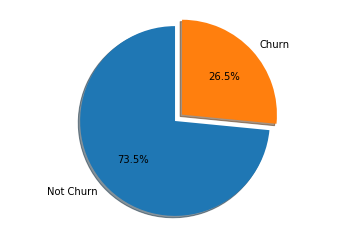

In [13]:
labels = 'Not Churn', 'Churn'
sizes = [telco_df.Churn.value_counts()[0], telco_df.Churn.value_counts()[1]]
explode = (0, 0.1)  # only "explode" a specific slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  #This sets up our chart as an even circle.

plt.show()

This data is decently balanced for our purposes.

# Getting the categorical variables and making them ready to be read by an algorithm

First, before we start, I'd like to drop the ID column, because it's annoying and isn't helpful

In [14]:
telco_df = telco_df.drop(["customerID"], axis=1)

In [15]:
for i in categorical_variables:
    telco_df[i] = telco_df[i].astype("category")

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 20 columns):
gender              6533 non-null category
SeniorCitizen       6533 non-null category
Partner             6533 non-null category
Dependents          6533 non-null category
tenure              6533 non-null int64
PhoneService        6533 non-null category
MultipleLines       6533 non-null category
InternetService     6533 non-null category
OnlineSecurity      6533 non-null category
OnlineBackup        6533 non-null category
DeviceProtection    6533 non-null category
TechSupport         6533 non-null category
StreamingTV         6533 non-null category
StreamingMovies     6533 non-null category
Contract            6533 non-null category
PaperlessBilling    6533 non-null category
PaymentMethod       6533 non-null category
MonthlyCharges      6533 non-null float64
TotalCharges        6533 non-null float64
Churn               6533 non-null object
dtypes: category(16), float64(2), int64(

Now that's it's been transformed to the Category type, Python has some methods that will allow us to work with the data and one-hot encode it

### Convert the category strings to numbers

In [16]:
numberEncodeArray = [] # this array will contain a bunch of maps
for i in categorical_variables:
    map = dict(zip(telco_df[i].cat.codes, telco_df[i]))
    numberEncodeArray.append(map)

numberEncodeArray

[{0: 'Female', 1: 'Male'},
 {0: 0, 1: 1},
 {1: 'Yes', 0: 'No'},
 {0: 'No', 1: 'Yes'},
 {0: 'No', 1: 'Yes'},
 {1: 'No phone service', 0: 'No', 2: 'Yes'},
 {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 {0: 'No', 2: 'Yes', 1: 'No internet service'},
 {2: 'Yes', 0: 'No', 1: 'No internet service'},
 {0: 'No', 2: 'Yes', 1: 'No internet service'},
 {0: 'No', 2: 'Yes', 1: 'No internet service'},
 {0: 'No', 2: 'Yes', 1: 'No internet service'},
 {0: 'No', 2: 'Yes', 1: 'No internet service'},
 {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 {1: 'Yes', 0: 'No'},
 {2: 'Electronic check',
  3: 'Mailed check',
  0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)'}]

### Next we have to one_hot_encode our dataframe

In [17]:
from copy import deepcopy
encoded_data = deepcopy(telco_df)

encoded_data = pd.get_dummies(encoded_data)

# for binary, we only need 1 column. For 3-way variable, we only need 2 columns
encoded_data_toDrop = ["gender_Female", "SeniorCitizen_0", "Partner_No", "Dependents_No", "PhoneService_No", "PaperlessBilling_No", "Churn_No"]

otherColumnsToDrop = ["MultipleLines_Yes", "InternetService_No", "OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes", "TechSupport_Yes",
                     "StreamingTV_Yes", "StreamingMovies_Yes", "Contract_Two year", "PaymentMethod_Mailed check"]

encoded_data = encoded_data.drop(encoded_data_toDrop + otherColumnsToDrop, axis=1)

encoded_data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
2,2,53.85,108.15,1,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,1,1


Now we've successfully encoded our data!

# Entropy Analysis
### This will help us determine what is most important, as well as help us interpret what our models return

In [18]:
from copy import deepcopy
entropy_data = deepcopy(encoded_data)

In [19]:
from scipy.stats import entropy

# here is my two-class entropy using base 2 log (to measure bits)
def entropyTN(t,n):
    return -(t/n * np.log2(t/n) + (n-t)/n * np.log2((n-t)/n)) if (n>0 and t>0 and t<n) else 0

# scikit learn can calculate entropy from counts.  By default, it uses natural (base e) log, but we can set the base to what we want instead.  
def column_entropy(series, base=None):
    vals,counts = np.unique(series.values, return_counts=True)
    return entropy(counts, base=base)

In [20]:
# entropy of our target variable (Terminated)
column_entropy(entropy_data.Churn_Yes, 2)

0.8348180828816781

In [21]:
# Calculate information gain for all possible splits into two classes. 
# np.bincount handles weights, but only for integer series. 

# return the unique items in a series of numbers (or booleans) and cumulative count of items and associated weights
# for each i, n
def prefix_countsck(series, weights=None):
    vals,nvals = np.unique(1*series.values, return_counts=True)
    cumnv = np.cumsum(nvals)
    cumwt = np.cumsum(np.bincount(1*series.values, weights=weights.values)[vals]) if (weights != None) else cumnv
    return vals, cumnv, cumwt

def prefix_counts(series, weight):
    perm = np.argsort(series.values) # get the permutation for sorting

    prev = series.iat[perm[0]] # remember last element we saw in the series
    vals = [prev]
    cumnv = [1] # count repeats
    cumwt = [1*weight.iat[perm[0]]] # start to accumulate weight
    for i in range(1,len(perm)):
        if prev == series.iat[perm[i]]:  # count repeat
            cumnv[-1] = cumnv[-1] + 1
            cumwt[-1] = cumwt[-1] + weight.iat[perm[i]]
        else: # new value
            prev = series.iat[perm[i]] 
            vals.append(prev)
            cumnv.append(cumnv[-1] + 1)
            cumwt.append(cumwt[-1] + weight.iat[perm[i]]) # start counting a new value
    return vals, cumnv, cumwt
def all_splits_information_gain(series, target):
    vals,nvals,ntarg = prefix_counts(series, target)
    N = nvals[-1] # grand totals give parent entropy
    T = ntarg[-1]
    entropy = [entropyTN(T,N) - nvals[i]/N * entropyTN(ntarg[i], nvals[i]) - (N-nvals[i])/N*entropyTN(T-ntarg[i], N-nvals[i]) 
               for i in range(0,len(vals)-1)]
    return entropy, vals[:-1]

In [22]:
def get_splits_array(df, target):
    entropies = []
    for c in df.columns:
        if c != target:
            ig, vals = all_splits_information_gain(df[c], df[target])
            if not ig: 
                print(f'No split on {c} column')
            else: 
                imax = np.argmax(ig)
                entropies.append([c, ig[imax], vals[imax]])
#                 print(f'Splitting on {c} column, information gain: {ig[imax]:16.6g} for split {vals[imax]}')
    return entropies

# show information gain when splitting on each column                
list = get_splits_array(entropy_data, "Churn_Yes")
list.sort(key=lambda x: x[1])

In [23]:
x_axis = []
y_axis = []
for i in list:
    x_axis.append(i[0])
    y_axis.append(i[1])

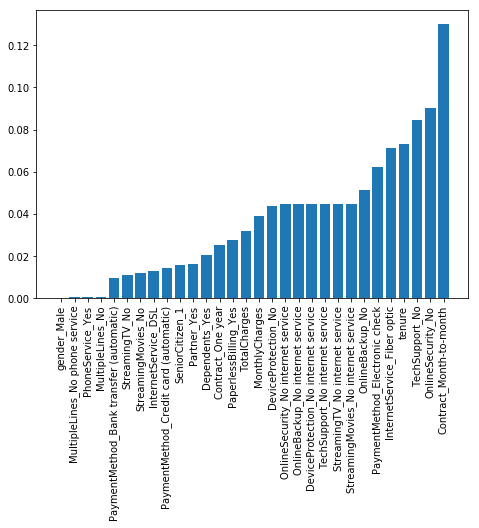

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.show()

In [25]:
def all_splits_information_gain(series, target):
    vals,nvals,ntarg = prefix_counts(series, target)
    N = nvals[-1] # grand totals give parent entropy
    T = ntarg[-1]
    entropy = [entropyTN(T,N) - nvals[i]/N * entropyTN(ntarg[i], nvals[i]) - (N-nvals[i])/N*entropyTN(T-ntarg[i], N-nvals[i]) 
               for i in range(0,len(vals)-1)]
    return entropy, vals[:-1]

In [26]:
def report_splits_ig(df, target):
    for c in df.columns:
        if c != target:
            ig, vals = all_splits_information_gain(df[c], df[target])
            if not ig: 
                print(f'No split on {c} column')
            else: 
                imax = np.argmax(ig)
                print(f'Splitting on {c} column, information gain: {ig[imax]:16.6g} for split {vals[imax]}')

# show information gain when splitting on each column                
report_splits_ig(entropy_data, 'Churn_Yes')


Splitting on tenure column, information gain:        0.0730421 for split 17
Splitting on MonthlyCharges column, information gain:        0.0387936 for split 68.8
Splitting on TotalCharges column, information gain:        0.0319314 for split 347.65
Splitting on gender_Male column, information gain:      0.000131893 for split 0
Splitting on SeniorCitizen_1 column, information gain:        0.0159152 for split 0
Splitting on Partner_Yes column, information gain:        0.0163393 for split 0
Splitting on Dependents_Yes column, information gain:        0.0206845 for split 0
Splitting on PhoneService_Yes column, information gain:      0.000405938 for split 0
Splitting on MultipleLines_No column, information gain:      0.000812399 for split 0
Splitting on MultipleLines_No phone service column, information gain:      0.000405938 for split 0
Splitting on InternetService_DSL column, information gain:        0.0128936 for split 0
Splitting on InternetService_Fiber optic column, information gain:  

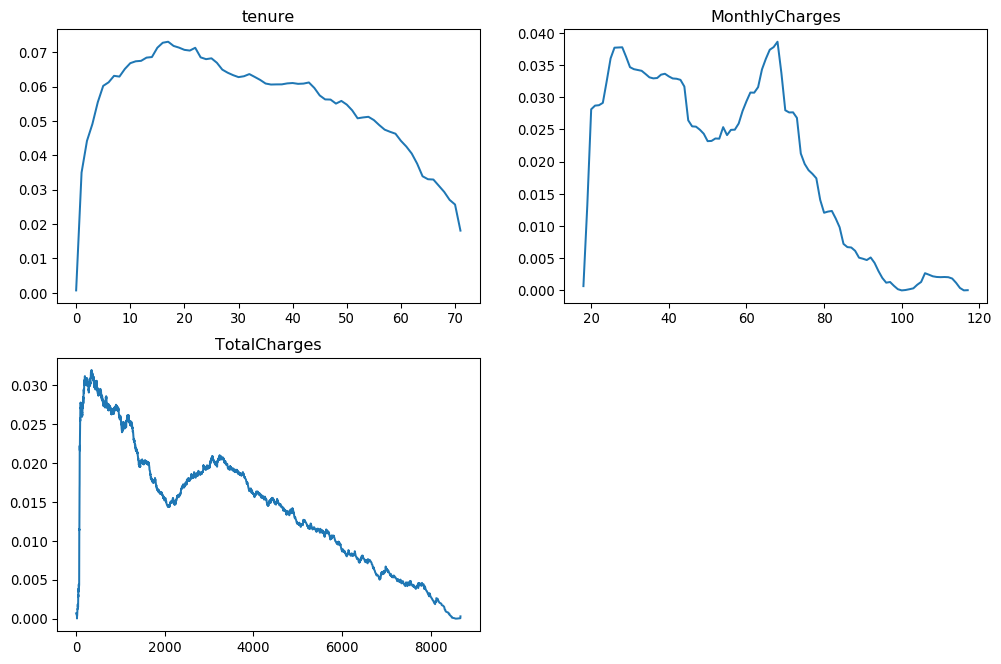

In [27]:
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)
for i,c in enumerate(numerical_variables):
    ent,vals = all_splits_information_gain(np.floor(entropy_data[c]).astype('int'), entropy_data.Churn_Yes)
    plt.subplot(3,2,i+1)
    plt.plot(vals, ent)
    plt.title(c)
plt.subplots_adjust(top=.9)
plt.show()

# Splitting the data

In [28]:
from sklearn.metrics import confusion_matrix

def getConfusionMatrix(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()

    print("True Positives: ", tp)
    print("False Negatives: (said wouldn't leave but did)", fn)
    print("False Positives: (said would be terminated but didn't)", fp)
    print("True Negatives: ", tn)

    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1 = (2 * precision * recall)/(precision + recall)

    print("\nAccuracy: ", (tn+tp)/(tp+fn+fp+tn))
    print("Precision: (want less false positives)", precision)
    print("Recall: (want less false negatives)", recall)
    print("F1 Score: ", f1)

Set up the features and target variable

In [29]:
# Use numpy to convert to arrays
import numpy as np

target_variable = "Churn_Yes"

# this is the variable I want to predict
labels = np.array(encoded_data[target_variable])
# these are all the feature columns. 
features = encoded_data.drop([target_variable], axis = 1)

# features we should drop based on analysis of what XGB deemed was just noise
features_to_drop = [
"SeniorCitizen_1",
"Dependents_Yes",
"PhoneService_Yes",
"InternetService_DSL",
"InternetService_Fiber optic",
"DeviceProtection_No",
"PaymentMethod_Bank transfer (automatic)",
"PaymentMethod_Credit card (automatic)",
"MultipleLines_No phone service",
"OnlineSecurity_No internet service",
"OnlineBackup_No internet service",
"DeviceProtection_No internet service",
"TechSupport_No internet service",
"StreamingTV_No",
"StreamingTV_No internet service",
"StreamingMovies_No internet service",
"StreamingMovies_No",
"Partner_Yes"
]

features = features.drop(features_to_drop, axis = 1)


# Saving feature names for later use
feature_list = features.columns.tolist()
# Convert to numpy array
features = np.array(features)

In [30]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [31]:
NormalizeData(features)

array([[1.15143699e-04, 3.43703943e-03, 3.43703943e-03, ...,
        0.00000000e+00, 1.15143699e-04, 1.15143699e-04],
       [3.91488578e-03, 6.55743368e-03, 2.17564020e-01, ...,
        1.15143699e-04, 0.00000000e+00, 0.00000000e+00],
       [2.30287399e-04, 6.20048821e-03, 1.24527911e-02, ...,
        0.00000000e+00, 1.15143699e-04, 0.00000000e+00],
       ...,
       [6.33290346e-03, 6.90862196e-03, 3.81828021e-01, ...,
        1.15143699e-04, 0.00000000e+00, 0.00000000e+00],
       [1.15143699e-04, 8.72213522e-03, 8.72213522e-03, ...,
        0.00000000e+00, 1.15143699e-04, 1.15143699e-04],
       [4.60574797e-04, 8.56669123e-03, 3.53030582e-02, ...,
        0.00000000e+00, 1.15143699e-04, 0.00000000e+00]])

Split the data into training and test data

In [32]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [33]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3919, 12)
Training Labels Shape: (3919,)
Testing Features Shape: (2614, 12)
Testing Labels Shape: (2614,)


# Making the Machine Learning Models

## XGBoost

In [34]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
print("Validation Data\n")
# Use the forest's predict method on the test data
predictions = XGB.predict(test_features)
getConfusionMatrix(test_labels, predictions)

Validation Data

True Positives:  378
False Negatives: (said wouldn't leave but did) 319
False Positives: (said would be terminated but didn't) 173
True Negatives:  1744

Accuracy:  0.8117827084927315
Precision: (want less false positives) 0.6860254083484574
Recall: (want less false negatives) 0.5423242467718795
F1 Score:  0.6057692307692308


Variable: MonthlyCharges       Importance: 0.28
Variable: TotalCharges         Importance: 0.28
Variable: tenure               Importance: 0.17
Variable: Contract_Month-to-month Importance: 0.05
Variable: gender_Male          Importance: 0.04
Variable: Contract_One year    Importance: 0.04
Variable: PaperlessBilling_Yes Importance: 0.04
Variable: MultipleLines_No     Importance: 0.03
Variable: OnlineSecurity_No    Importance: 0.03
Variable: TechSupport_No       Importance: 0.02
Variable: PaymentMethod_Electronic check Importance: 0.02
Variable: OnlineBackup_No      Importance: 0.01


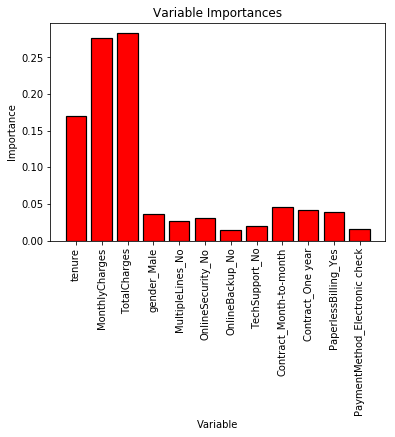

In [36]:
import matplotlib.pyplot as plt

# Get numerical feature importances
importances = XGB.feature_importances_.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

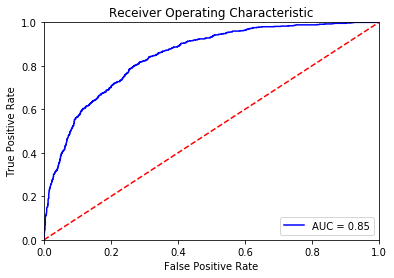

In [45]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = XGB.predict_proba(test_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression Classifier

In [46]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(train_features, train_labels)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = log.predict(test_features)
class_predictions = []
for i in predictions:
    if (i < 0.5):
        class_predictions.append(0)
    else:
        class_predictions.append(1)
getConfusionMatrix(test_labels, class_predictions)



True Positives:  364
False Negatives: (said wouldn't leave but did) 333
False Positives: (said would be terminated but didn't) 204
True Negatives:  1713

Accuracy:  0.7945677123182862
Precision: (want less false positives) 0.6408450704225352
Recall: (want less false negatives) 0.5222381635581061
F1 Score:  0.5754940711462451


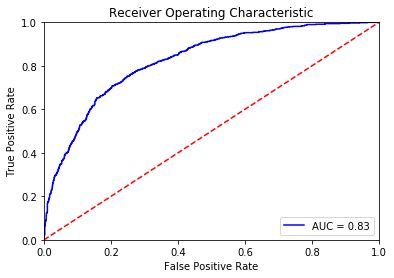

In [48]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = log.predict_proba(test_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Linear Regression Classifier

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
predictions = reg.predict(test_features)
class_predictions = []
for i in predictions:
    if (i < 0.5):
        class_predictions.append(0)
    else:
        class_predictions.append(1)
getConfusionMatrix(test_labels, class_predictions)


True Positives:  348
False Negatives: (said wouldn't leave but did) 349
False Positives: (said would be terminated but didn't) 180
True Negatives:  1737

Accuracy:  0.7976281560826319
Precision: (want less false positives) 0.6590909090909091
Recall: (want less false negatives) 0.49928263988522237
F1 Score:  0.5681632653061225


In [42]:
for i in feature_importances:
    if (i[1] < 0.01):
        print('"' + str(i[0]) + "\",")

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False)

# Train the model on training data
rf.fit(train_features, train_labels)

In [ ]:
print("Validation Data\n")
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
getConfusionMatrix(test_labels, predictions)

In [ ]:
# Get numerical feature importances
importances = rf.feature_importances_.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Training our model on ALL the data

In [ ]:
train_features_1, test_features, train_labels_1, test_labels = train_test_split(features, labels, test_size = 0.0, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(train_features_1, train_labels_1)

# Get our Test data, which we have not looked at yet. Clean it the same way we did earlier, and then run our model on it.

In [ ]:
test_file = project.get_file("Test Data.csv")
test_df = pd.read_csv(test_file)

Below we are once again dropping the ID column, as it is irrelevant, and then converting category columns to a format which Python can process and we can run our model on.

In [ ]:
test_df = test_df.drop(["customerID"], axis=1)

In [ ]:
for i in categorical_variables:
    test_df[i] = test_df[i].astype("category")

In [ ]:
numberEncodeArrayTest = [] 
for i in categorical_variables:
    map = dict(zip(test_df[i].cat.codes, telco_df[i]))
    numberEncodeArrayTest.append(map)



# Now we one-hot encode the data, just like we did previously.

In [ ]:
from copy import deepcopy
encoded_test_data = deepcopy(test_df)

encoded_test_data = pd.get_dummies(encoded_test_data)

# Recall we need differing numbers of columns for our different categories; binary, needs 1 column and 3-way variable uses 2 columns
encoded_test_data_toDrop = ["gender_Female", "SeniorCitizen_0", "Partner_No", "Dependents_No", "PhoneService_No", "PaperlessBilling_No", "Churn_No"]

otherTestColumnsToDrop = ["MultipleLines_Yes", "InternetService_No", "OnlineSecurity_Yes", "OnlineBackup_Yes", "DeviceProtection_Yes", "TechSupport_Yes",
                     "StreamingTV_Yes", "StreamingMovies_Yes", "Contract_Two year", "PaymentMethod_Mailed check"]

encoded_test_data = encoded_test_data.drop(encoded_test_data_toDrop + otherTestColumnsToDrop, axis=1)

encoded_test_data.head()

Set up our features and our target variable (churn).

In [ ]:
# Converting to easy to use arrays
import numpy as np

test_target_variable = "Churn_Yes"

# Our target variables is stored here
test_labels = np.array(encoded_test_data[test_target_variable])
# Here are features of that variable
test_features = encoded_test_data.drop([test_target_variable], axis = 1)

# All the features deemed droppable (had little effect on Churn)
test_features_to_drop = [
"SeniorCitizen_1",
"Dependents_Yes",
"PhoneService_Yes",
"InternetService_DSL",
"InternetService_Fiber optic",
"DeviceProtection_No",
"PaymentMethod_Bank transfer (automatic)",
"PaymentMethod_Credit card (automatic)",
"MultipleLines_No phone service",
"OnlineSecurity_No internet service",
"OnlineBackup_No internet service",
"DeviceProtection_No internet service",
"TechSupport_No internet service",
"StreamingTV_No",
"StreamingTV_No internet service",
"StreamingMovies_No internet service",
"StreamingMovies_No",
"Partner_Yes"
]

test_features = test_features.drop(test_features_to_drop, axis = 1)


# Keep list of relevant features
test_feature_list = test_features.columns.tolist()
# Convert to handy array
test_features = np.array(features)

Normalize our data.

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
NormalizeData(test_features)

# Running XGboost on Test Data Set

In [ ]:
test_features, train_features, test_labels, train_labels = train_test_split(features, labels, test_size = 0, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
predictions = log.predict(test_features)
class_predictions = []
for i in predictions:
    if (i < 0.5):
        class_predictions.append(0)
    else:
        class_predictions.append(1)
getConfusionMatrix(test_labels, class_predictions)

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = XGB.predict_proba(test_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()